In [1]:
#import packegs
import numpy as np   # numpy is used for working with arrays
import pandas as pd  # pandas is used for working with data sets
import pandas_profiling as pp # pandas_profling used for exploratory data analysis
import os            # os is used fo handling the directory
import seaborn as sns # seaborn is used for visualization

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/spaceship-titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [3]:
train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [4]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train_data.shape, test_data.shape

((8693, 14), (4277, 13))

In [6]:
print(train_data.describe)

<bound method NDFrame.describe of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService

In [7]:
print(test_data.describe)

<bound method NDFrame.describe of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService

In [8]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

test_data['HomePlanet']= label_encoder.fit_transform(test_data['HomePlanet'])
train_data['HomePlanet']= label_encoder.fit_transform(train_data['HomePlanet'])

test_data['CryoSleep']= label_encoder.fit_transform(test_data['CryoSleep'])
train_data['CryoSleep']= label_encoder.fit_transform(train_data['CryoSleep'])

test_data['Cabin']= label_encoder.fit_transform(test_data['Cabin'])
train_data['Cabin']= label_encoder.fit_transform(train_data['Cabin'])

test_data['Destination']= label_encoder.fit_transform(test_data['Destination'])
train_data['Destination']= label_encoder.fit_transform(train_data['Destination'])

test_data['Age']= label_encoder.fit_transform(test_data['Age'])
train_data['Age']= label_encoder.fit_transform(train_data['Age'])

test_data['VIP']= label_encoder.fit_transform(test_data['VIP'])
train_data['VIP']= label_encoder.fit_transform(train_data['VIP'])

test_data['RoomService']= label_encoder.fit_transform(test_data['RoomService'])
train_data['RoomService']= label_encoder.fit_transform(train_data['RoomService'])

test_data['FoodCourt']= label_encoder.fit_transform(test_data['FoodCourt'])
train_data['FoodCourt']= label_encoder.fit_transform(train_data['FoodCourt'])

test_data['ShoppingMall']= label_encoder.fit_transform(test_data['ShoppingMall'])
train_data['ShoppingMall']= label_encoder.fit_transform(train_data['ShoppingMall'])

test_data['Spa']= label_encoder.fit_transform(test_data['Spa'])
train_data['Spa']= label_encoder.fit_transform(train_data['Spa'])

test_data['VRDeck']= label_encoder.fit_transform(test_data['VRDeck'])
train_data['VRDeck']= label_encoder.fit_transform(train_data['VRDeck'])

In [10]:
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [11]:

New_CryoSleep=train_data['CryoSleep'].mean()
New_CryoSleep1=test_data['CryoSleep'].mean()

New_Cabin=train_data['Cabin'].mean()
New_Cabin1=test_data['Cabin'].mean()

New_age=train_data['Age'].mean()
New_age1=test_data['Age'].mean()

New_VIP=train_data['VIP'].mean()
New_VIP1=test_data['VIP'].mean()

New_RoomService=train_data['RoomService'].mean()
New_RoomService1=test_data['RoomService'].mean()

New_FoodCourt=train_data['FoodCourt'].mean()
New_FoodCourt1=test_data['FoodCourt'].mean()

New_ShoppingMall=train_data['ShoppingMall'].mean()
New_ShoppingMall1=test_data['ShoppingMall'].mean()

New_spa=train_data['Spa'].mean()
New_spa1=test_data['Spa'].mean()

New_VRDeck=train_data['VRDeck'].mean()
New_VRDeck1=test_data['VRDeck'].mean()

In [12]:
# fillna() is used for fill all NaN into the data that we are giving

train_data['HomePlanet'] = train_data['HomePlanet'].fillna(0)
test_data['HomePlanet'] = test_data['HomePlanet'].fillna(0)

train_data['CryoSleep'] = train_data['CryoSleep'].fillna(0)
test_data['CryoSleep'] = test_data['CryoSleep'].fillna(0)

train_data['Cabin'] = train_data['Cabin'].fillna(New_Cabin)
test_data['Cabin'] = test_data['Cabin'].fillna(New_Cabin1)

train_data['Destination'] = train_data['Destination'].fillna(0)
test_data['Destination'] = test_data['Destination'].fillna(0)

train_data['Age'] = train_data['Age'].fillna(New_age)
test_data['Age'] = test_data['Age'].fillna(New_age1)

train_data['RoomService'] = train_data['RoomService'].fillna(New_RoomService)
test_data['RoomService'] = test_data['RoomService'].fillna(New_RoomService1)

train_data['FoodCourt'] = train_data['FoodCourt'].fillna(New_FoodCourt)
test_data['FoodCourt'] = test_data['FoodCourt'].fillna(New_FoodCourt)

train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(New_ShoppingMall)
test_data['ShoppingMall'] = test_data['ShoppingMall'].fillna(New_ShoppingMall1)

train_data['Spa'] = train_data['Spa'].fillna(New_spa)
test_data['Spa'] = test_data['Spa'].fillna(New_spa1)

train_data['VRDeck'] = train_data['VRDeck'].fillna(New_VRDeck)
test_data['VRDeck'] = test_data['VRDeck'].fillna(New_VRDeck1)

In [13]:
test_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,0,1,2784,2,27,0,0,0,0,0,0,Nelly Carsoning


<AxesSubplot:xlabel='Age', ylabel='count'>

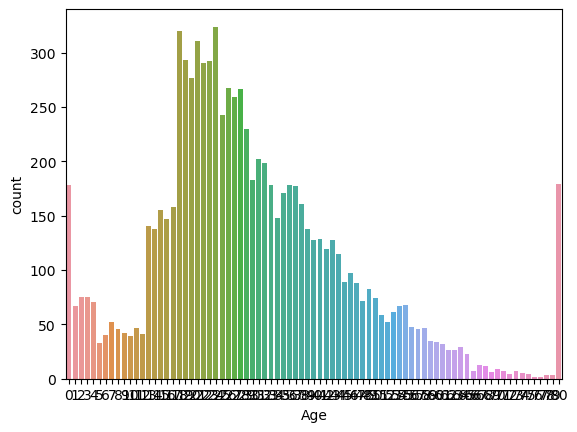

In [14]:
sns.countplot(x = train_data.Age)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

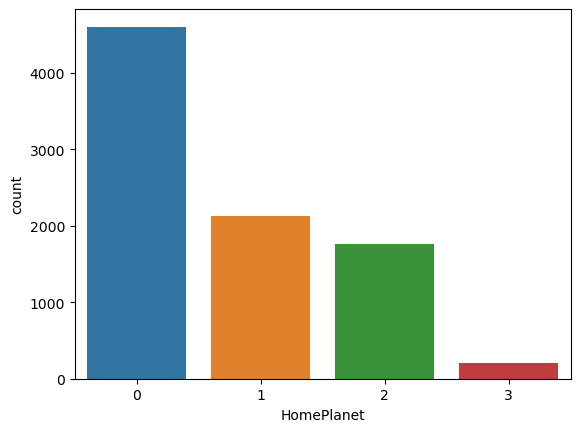

In [15]:
sns.countplot(x = train_data.HomePlanet)

<AxesSubplot:xlabel='VIP', ylabel='count'>

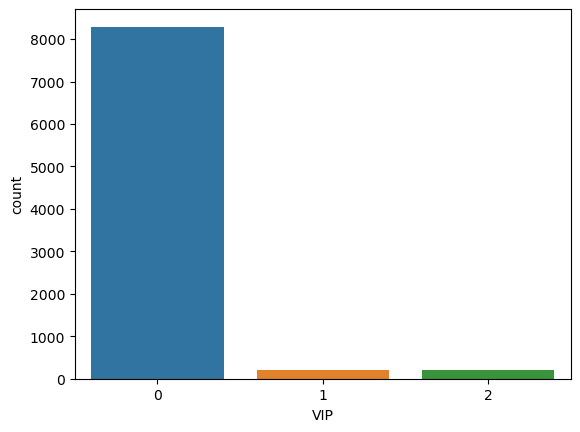

In [16]:
sns.countplot(x = train_data.VIP)

In [17]:
y = train_data["Transported"]
Data = ['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService',
        'FoodCourt','ShoppingMall','Spa','VRDeck']

X = pd.get_dummies(train_data[Data])
X_test = pd.get_dummies(test_data[Data])

In [18]:
# we are using lgb for training to get desire output.
import lightgbm as lgb
model = lgb.LGBMClassifier()

model.fit(X, y)

y_pred = model.predict(X_test)


numeric = np.array([[0,1,2784,2,27,0,0,0,0,0,0]])
columns = ['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService',
        'FoodCourt','ShoppingMall','Spa','VRDeck']

# pd.DataFrame is used for creating a dataset
new_data = pd.DataFrame(data = numeric, columns = columns)

In [19]:
model.score(X_test,y_pred)

1.0

In [20]:
model.predict(new_data)

array([ True])

In [21]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': y_pred})
output.to_csv('submission.csv', index=False)